In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from math import *

# Data cleaning- johns hopkins dataset 
first, reading in the latest US reported daily report (4/16)

In [2]:
df = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us/04-16-2020.csv")
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-16 23:30:51,32.3182,-86.9023,4345,133,NaN,4212.0,1.0,92.665716,36391.0,553.0,3.060990,84000001,USA,776.110032,12.727273
1,Alaska,US,2020-04-16 23:30:51,61.3707,-152.4044,300,9,110.0,291.0,2.0,50.188290,8735.0,35.0,3.000000,84000002,USA,1461.315703,11.666667
2,American Samoa,US,NaN,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,3.0,NaN,NaN,16,ASM,5.391708,NaN
3,Arizona,US,2020-04-16 23:30:51,33.7298,-111.4312,4237,150,460.0,4087.0,4.0,58.210808,47398.0,578.0,3.540241,84000004,USA,651.186191,13.641728
4,Arkansas,US,2020-04-16 23:30:51,34.9697,-92.3731,1620,37,548.0,1583.0,5.0,62.571769,22675.0,85.0,2.283951,84000005,USA,875.811647,5.246914


This is the Johns Hopkins dataset. It contains 18 variables. 
We don't need all the variables, taking out some irrelevent variables for this project.

In [3]:
df.set_index("Province_State", inplace = True)
df.drop(['Last_Update','Lat', "Long_", "FIPS", 'UID', 'ISO3'], axis = 1, inplace = True)

In [4]:
# for dataframe information is calculated by column
print("dataframe shape:")
display(df.shape)  #59 regions, 11 variables
display(df.info())
df.mean()

dataframe shape:


(59, 11)

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, Alabama to Recovered
Data columns (total 11 columns):
Country_Region          59 non-null object
Confirmed               59 non-null int64
Deaths                  59 non-null int64
Recovered               32 non-null float64
Active                  58 non-null float64
Incident_Rate           56 non-null float64
People_Tested           56 non-null float64
People_Hospitalized     49 non-null float64
Mortality_Rate          57 non-null float64
Testing_Rate            56 non-null float64
Hospitalization_Rate    49 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 5.5+ KB


None

Confirmed               11318.661017
Deaths                    557.915254
Recovered                3022.968750
Active                  10003.120690
Incident_Rate             160.063317
People_Tested           60733.285714
People_Hospitalized      2223.306122
Mortality_Rate              3.555082
Testing_Rate             1137.003935
Hospitalization_Rate       14.652850
dtype: float64

In [5]:
#dropping the cruises- Diamond Princess and Grand Princess, because they cannot be taken account into social distancing modeling 
#also dropping american samoa, too many NaNs
df.drop(["American Samoa", "Diamond Princess", "Grand Princess", "Recovered"], axis = 0, inplace = True)

#dropping recovered and people_hospitalized column, too many NaNs, also not necessarily useful for this project
df.drop(["Recovered", "People_Hospitalized", "Hospitalization_Rate"], axis = 1, inplace = True)

In [6]:
display(df)

,Country_Region,Confirmed,Deaths,Active,Incident_Rate,People_Tested,Mortality_Rate,Testing_Rate
Province_State,,,,,,,,
Alabama,US,4345,133,4212.0,92.665716,36391.0,3.060990,776.110032
Alaska,US,300,9,291.0,50.188290,8735.0,3.000000,1461.315703
Arizona,US,4237,150,4087.0,58.210808,47398.0,3.540241,651.186191
Arkansas,US,1620,37,1583.0,62.571769,22675.0,2.283951,875.811647
California,US,27677,957,26720.0,70.589069,246400.0,3.457745,628.433237
Colorado,US,8286,355,7931.0,146.219754,40533.0,4.284335,715.269765
Connecticut,US,15884,971,14913.0,445.518131,53122.0,6.113070,1489.978226
Delaware,US,2070,55,2015.0,212.577175,13350.0,2.657005,1370.968736
District of Columbia,US,2350,81,2269.0,332.979572,12150.0,3.446809,1721.575234


# Data Visualization
run some interesting and informative plots 

In [51]:
sns.set(color_codes=True, font_scale = 2.5, rc={'figure.figsize':(50,25)})

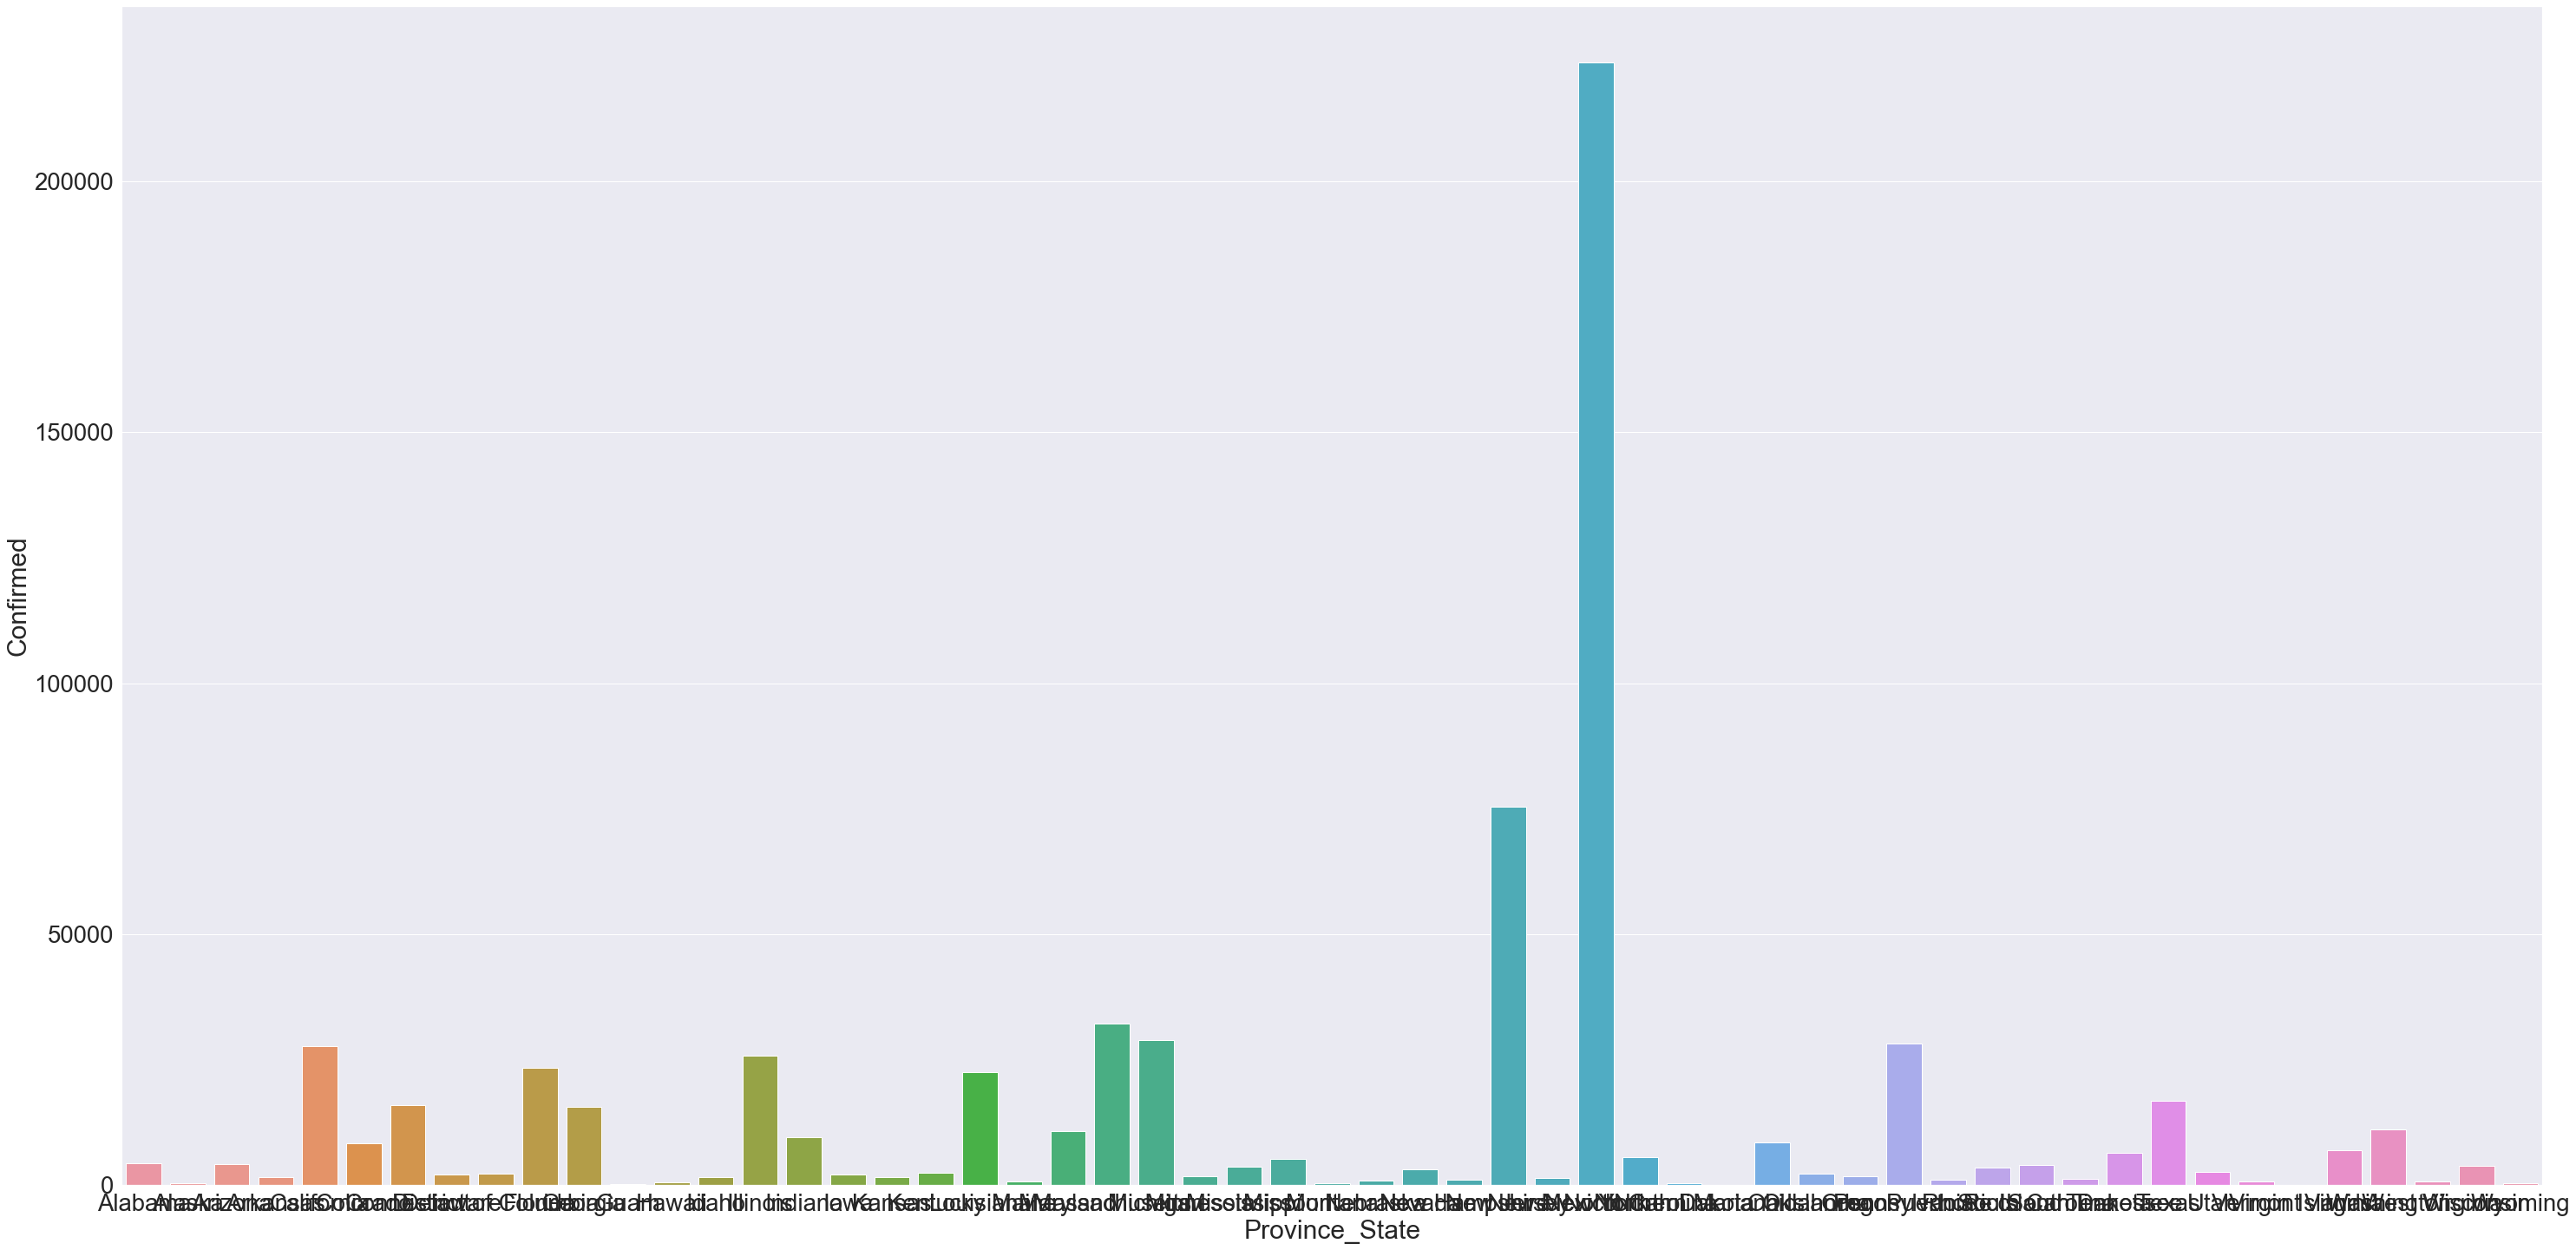

In [52]:
#all regions' accumulated confirmed cases 
sns.barplot(x = df.index, y = df.loc[:, "Confirmed"])  #too messy, break down regions into groups 

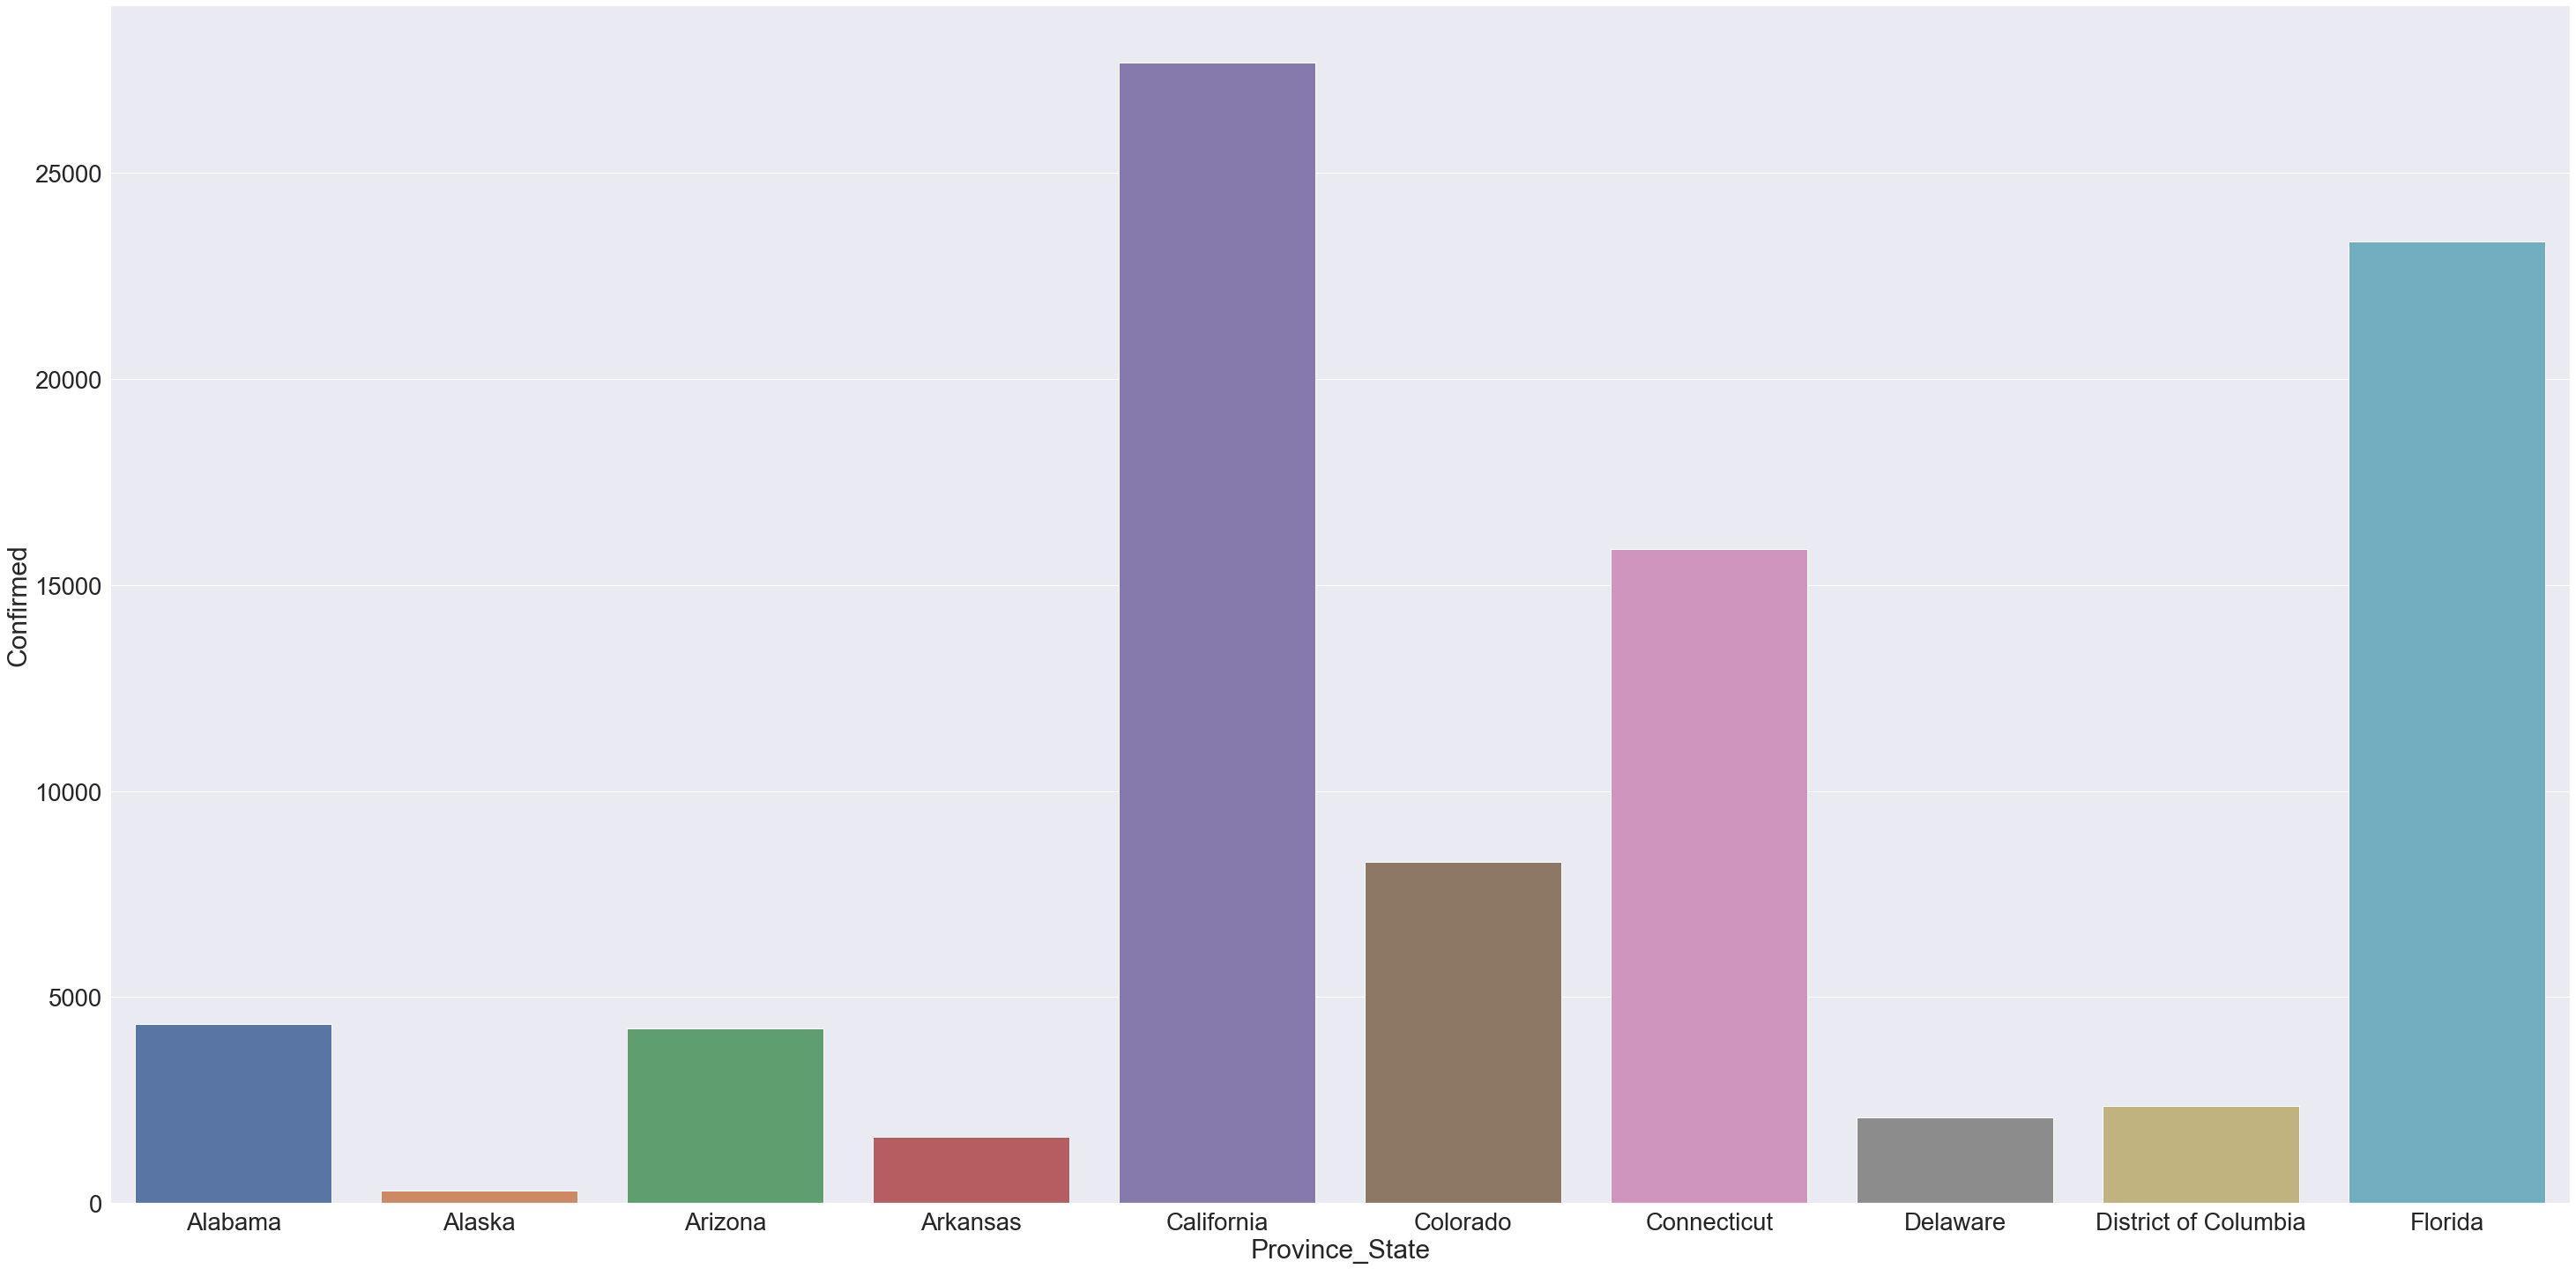

In [53]:
sns.barplot(x = df.index[0:10], y = df.loc["Alabama": "Florida", "Confirmed"])

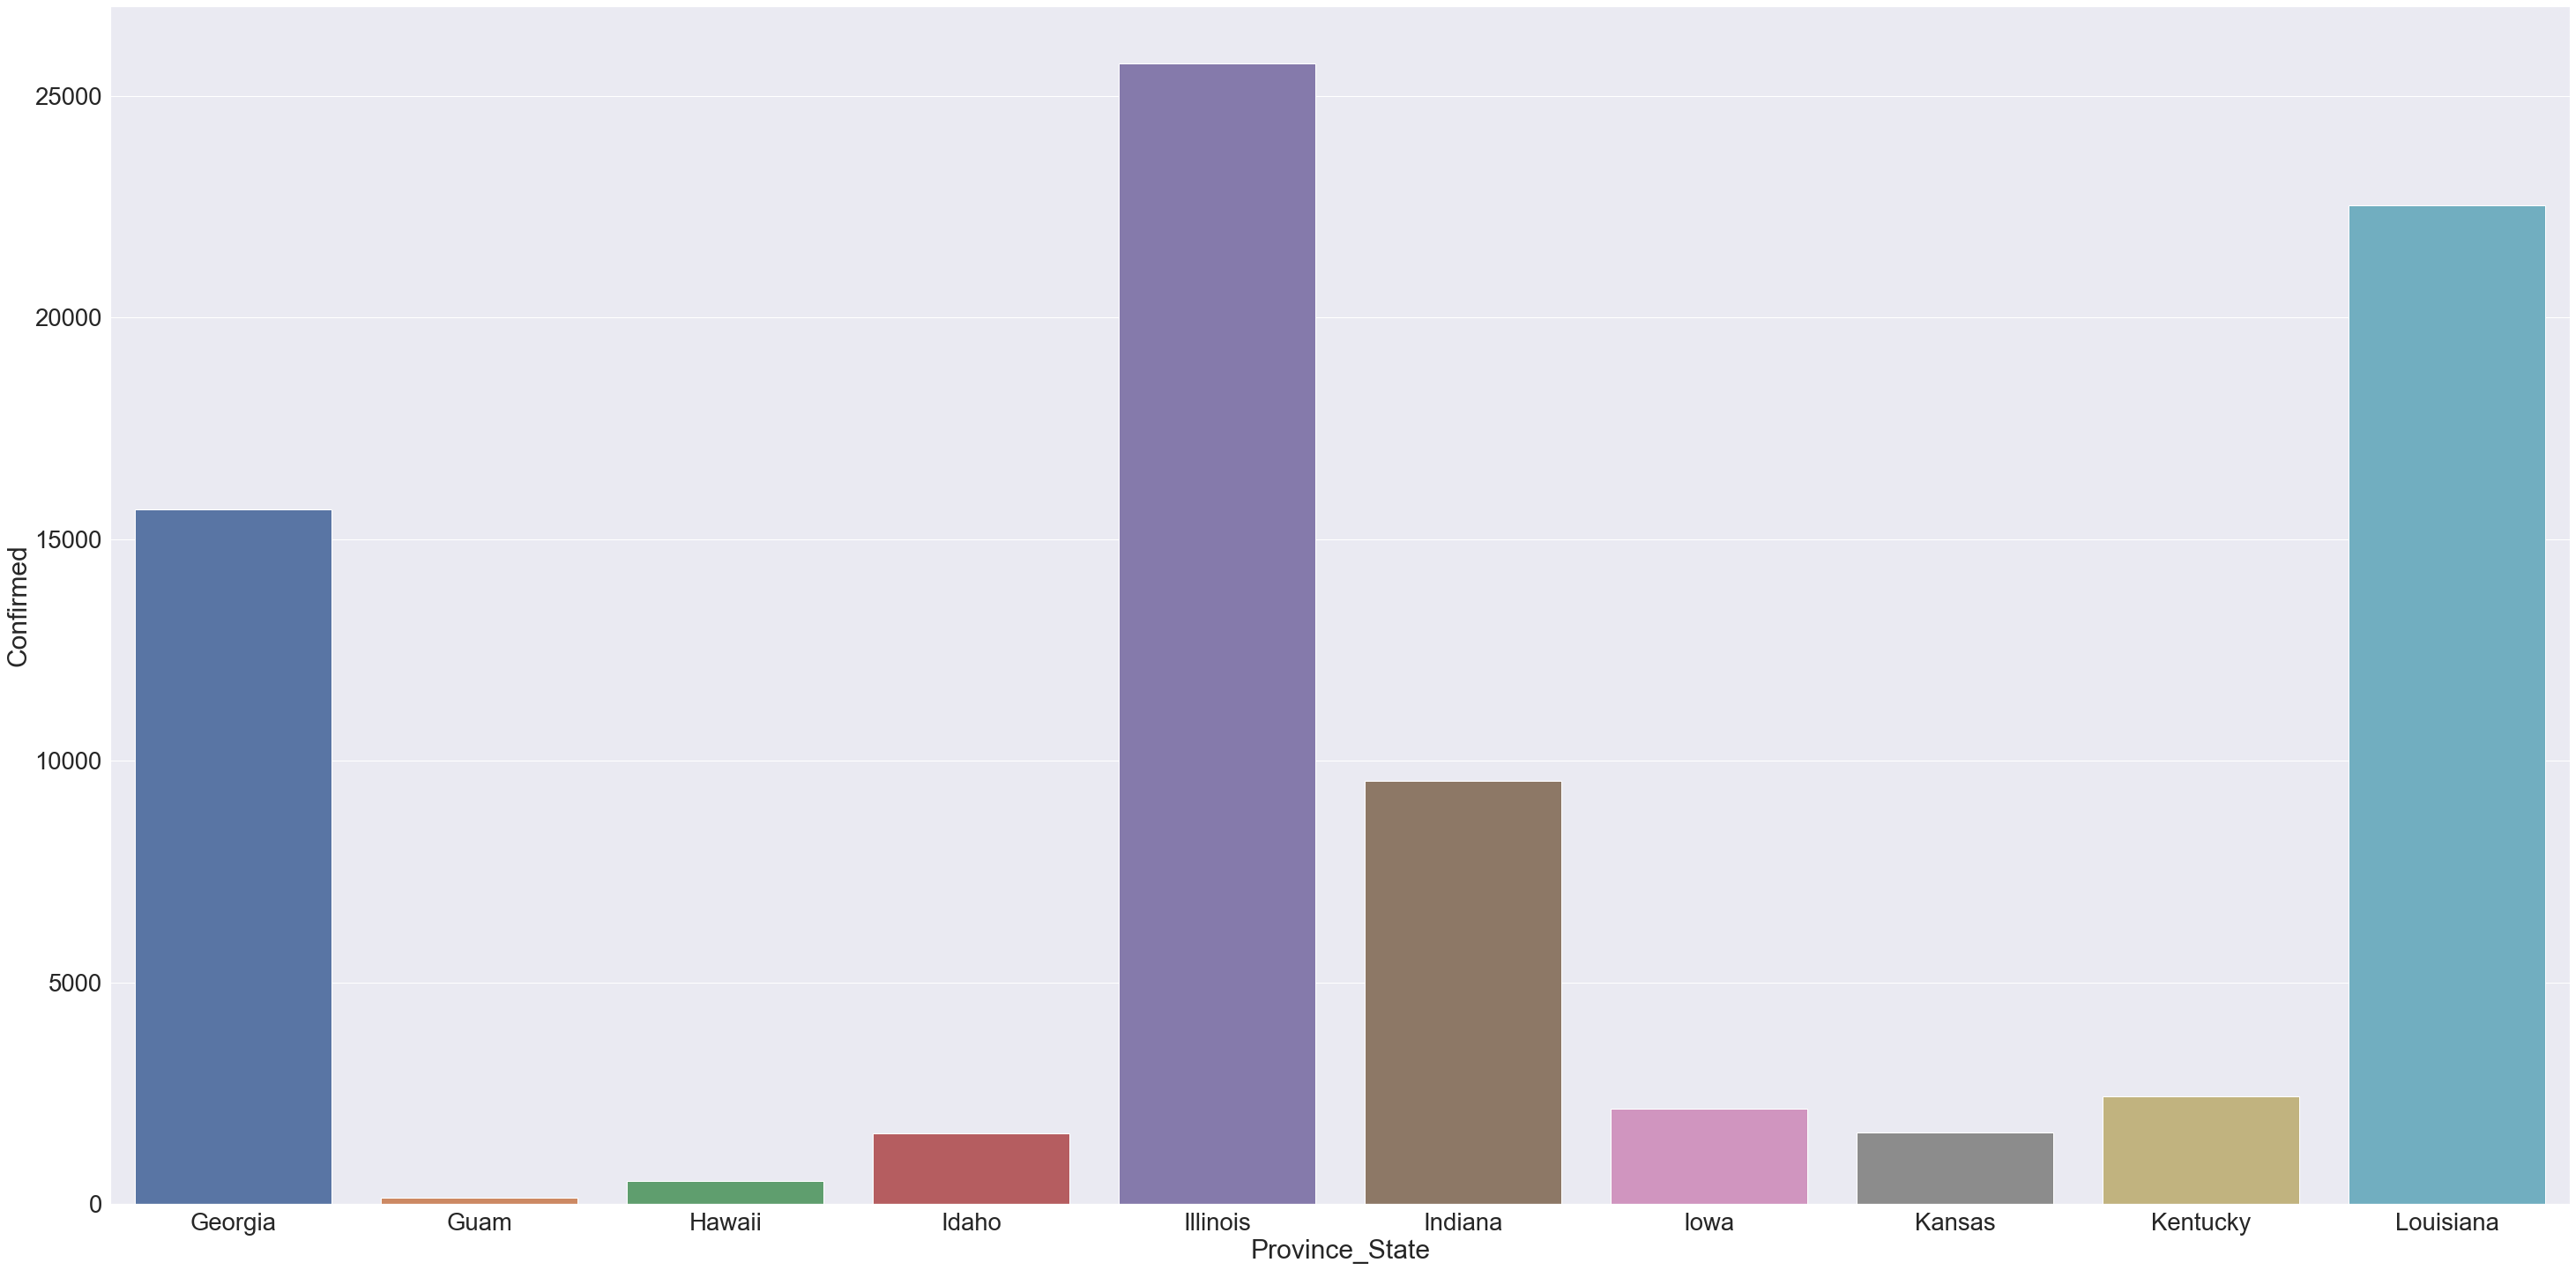

In [55]:
sns.barplot(x = df.index[10:20], y = df.loc["Georgia": "Louisina", "Confirmed"])

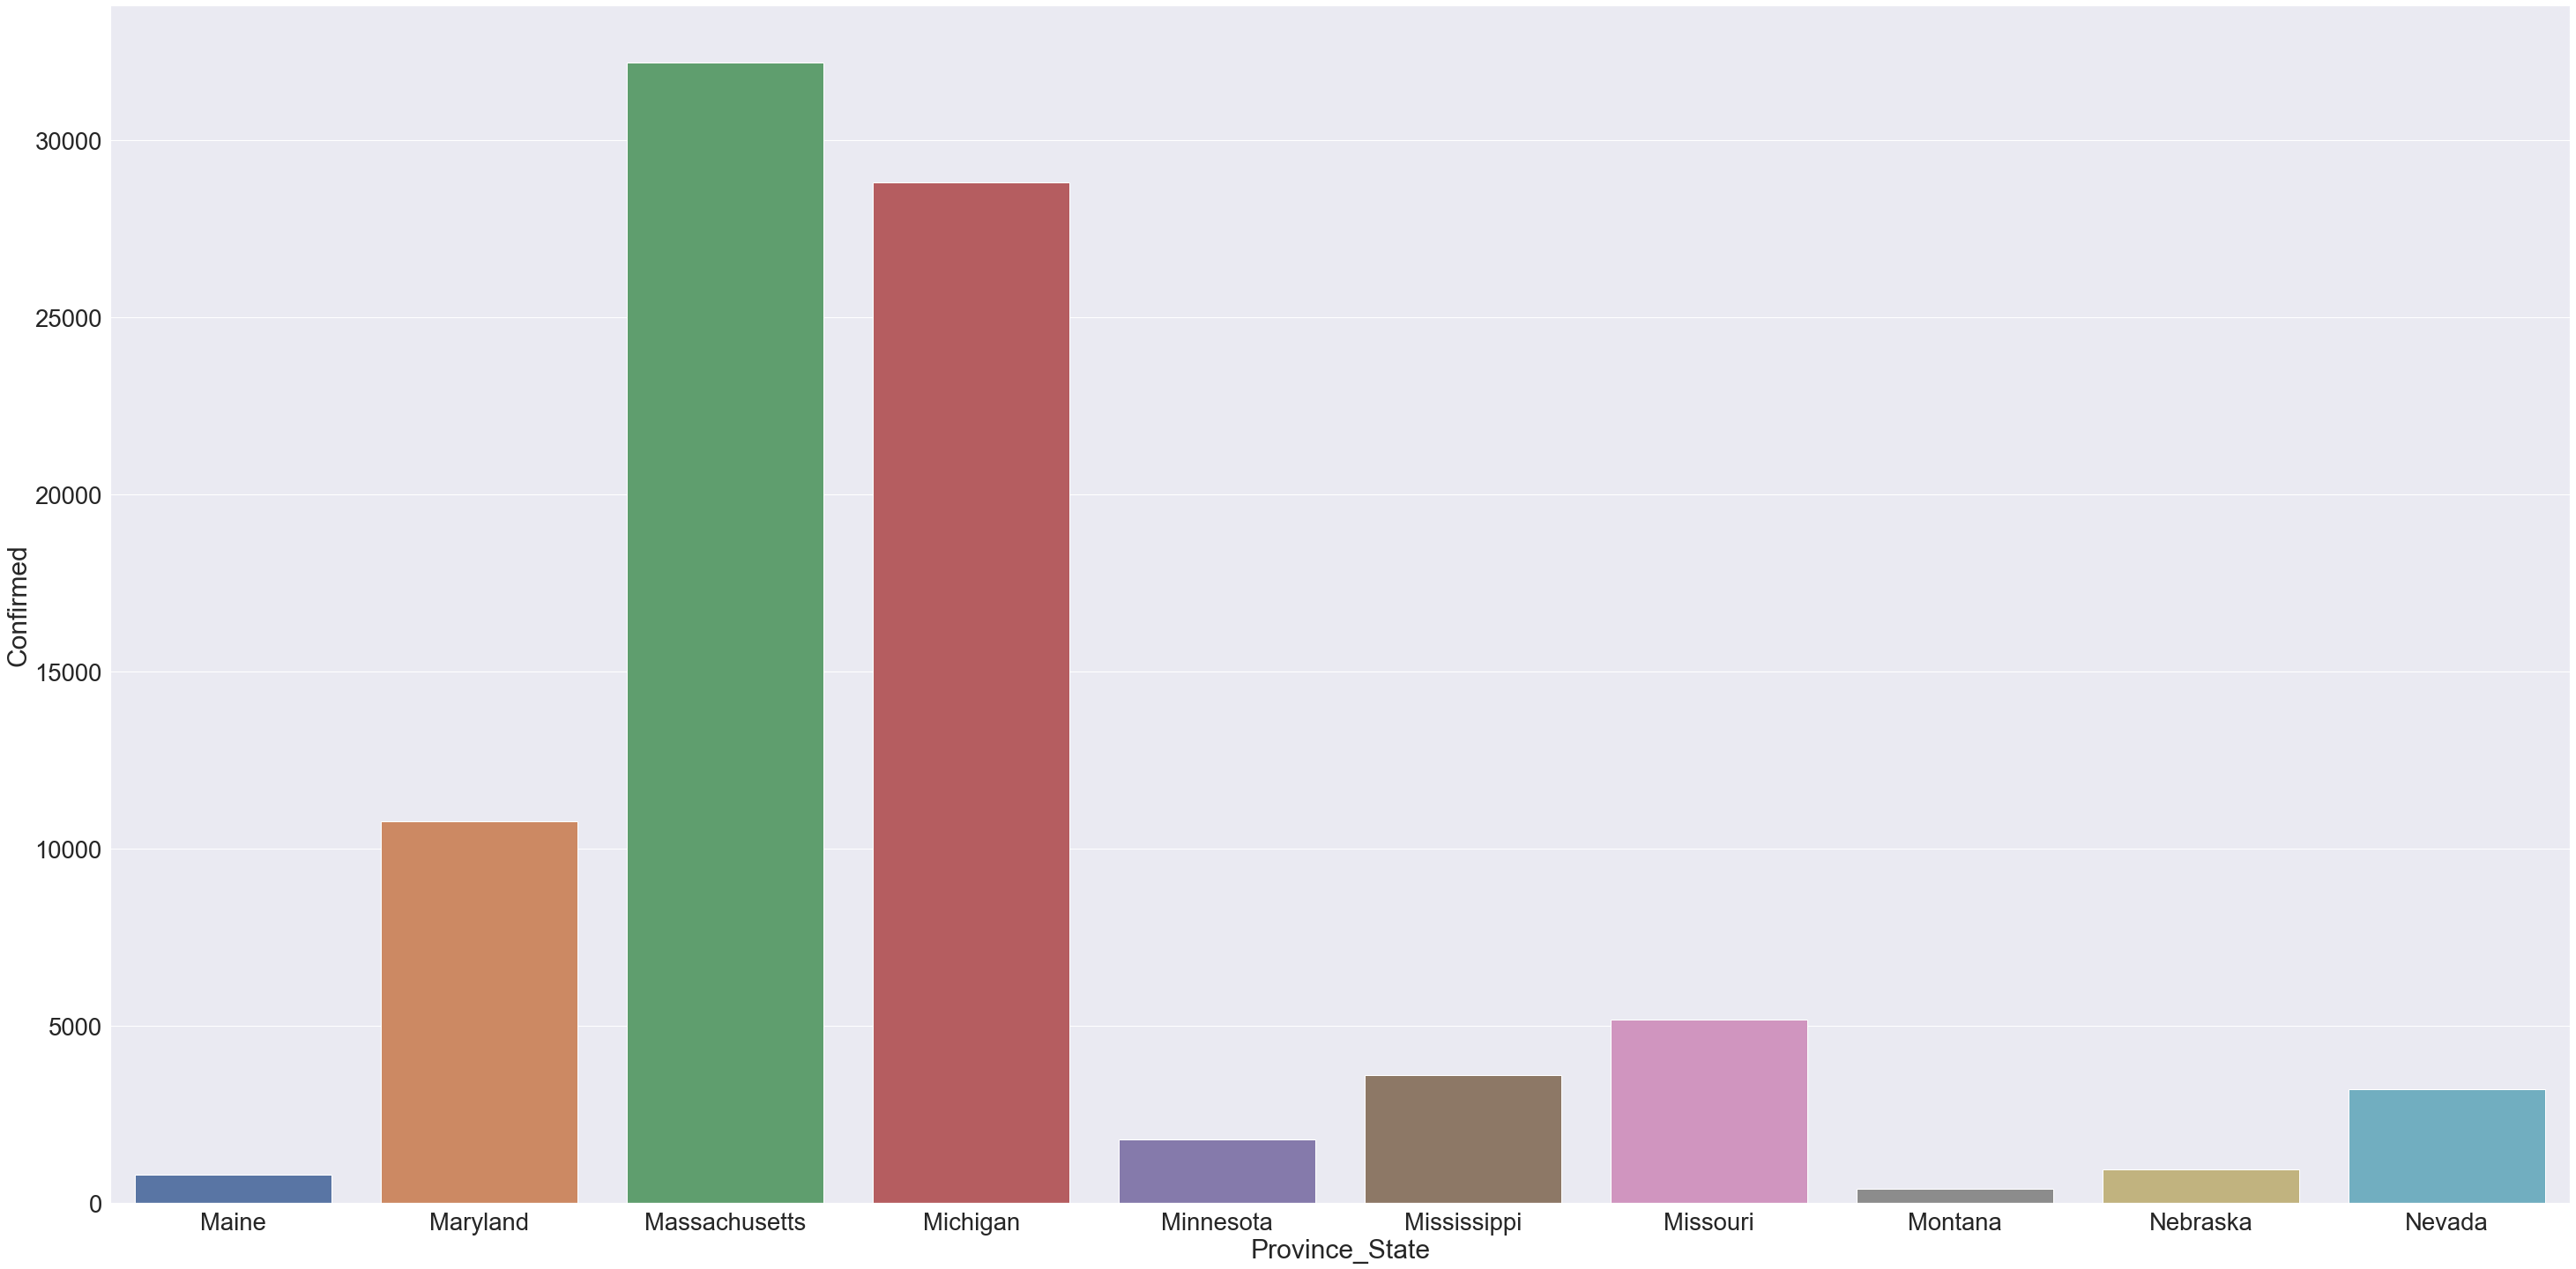

In [56]:
sns.barplot(x = df.index[20:30], y = df.loc["Maine": "Nevada", "Confirmed"])

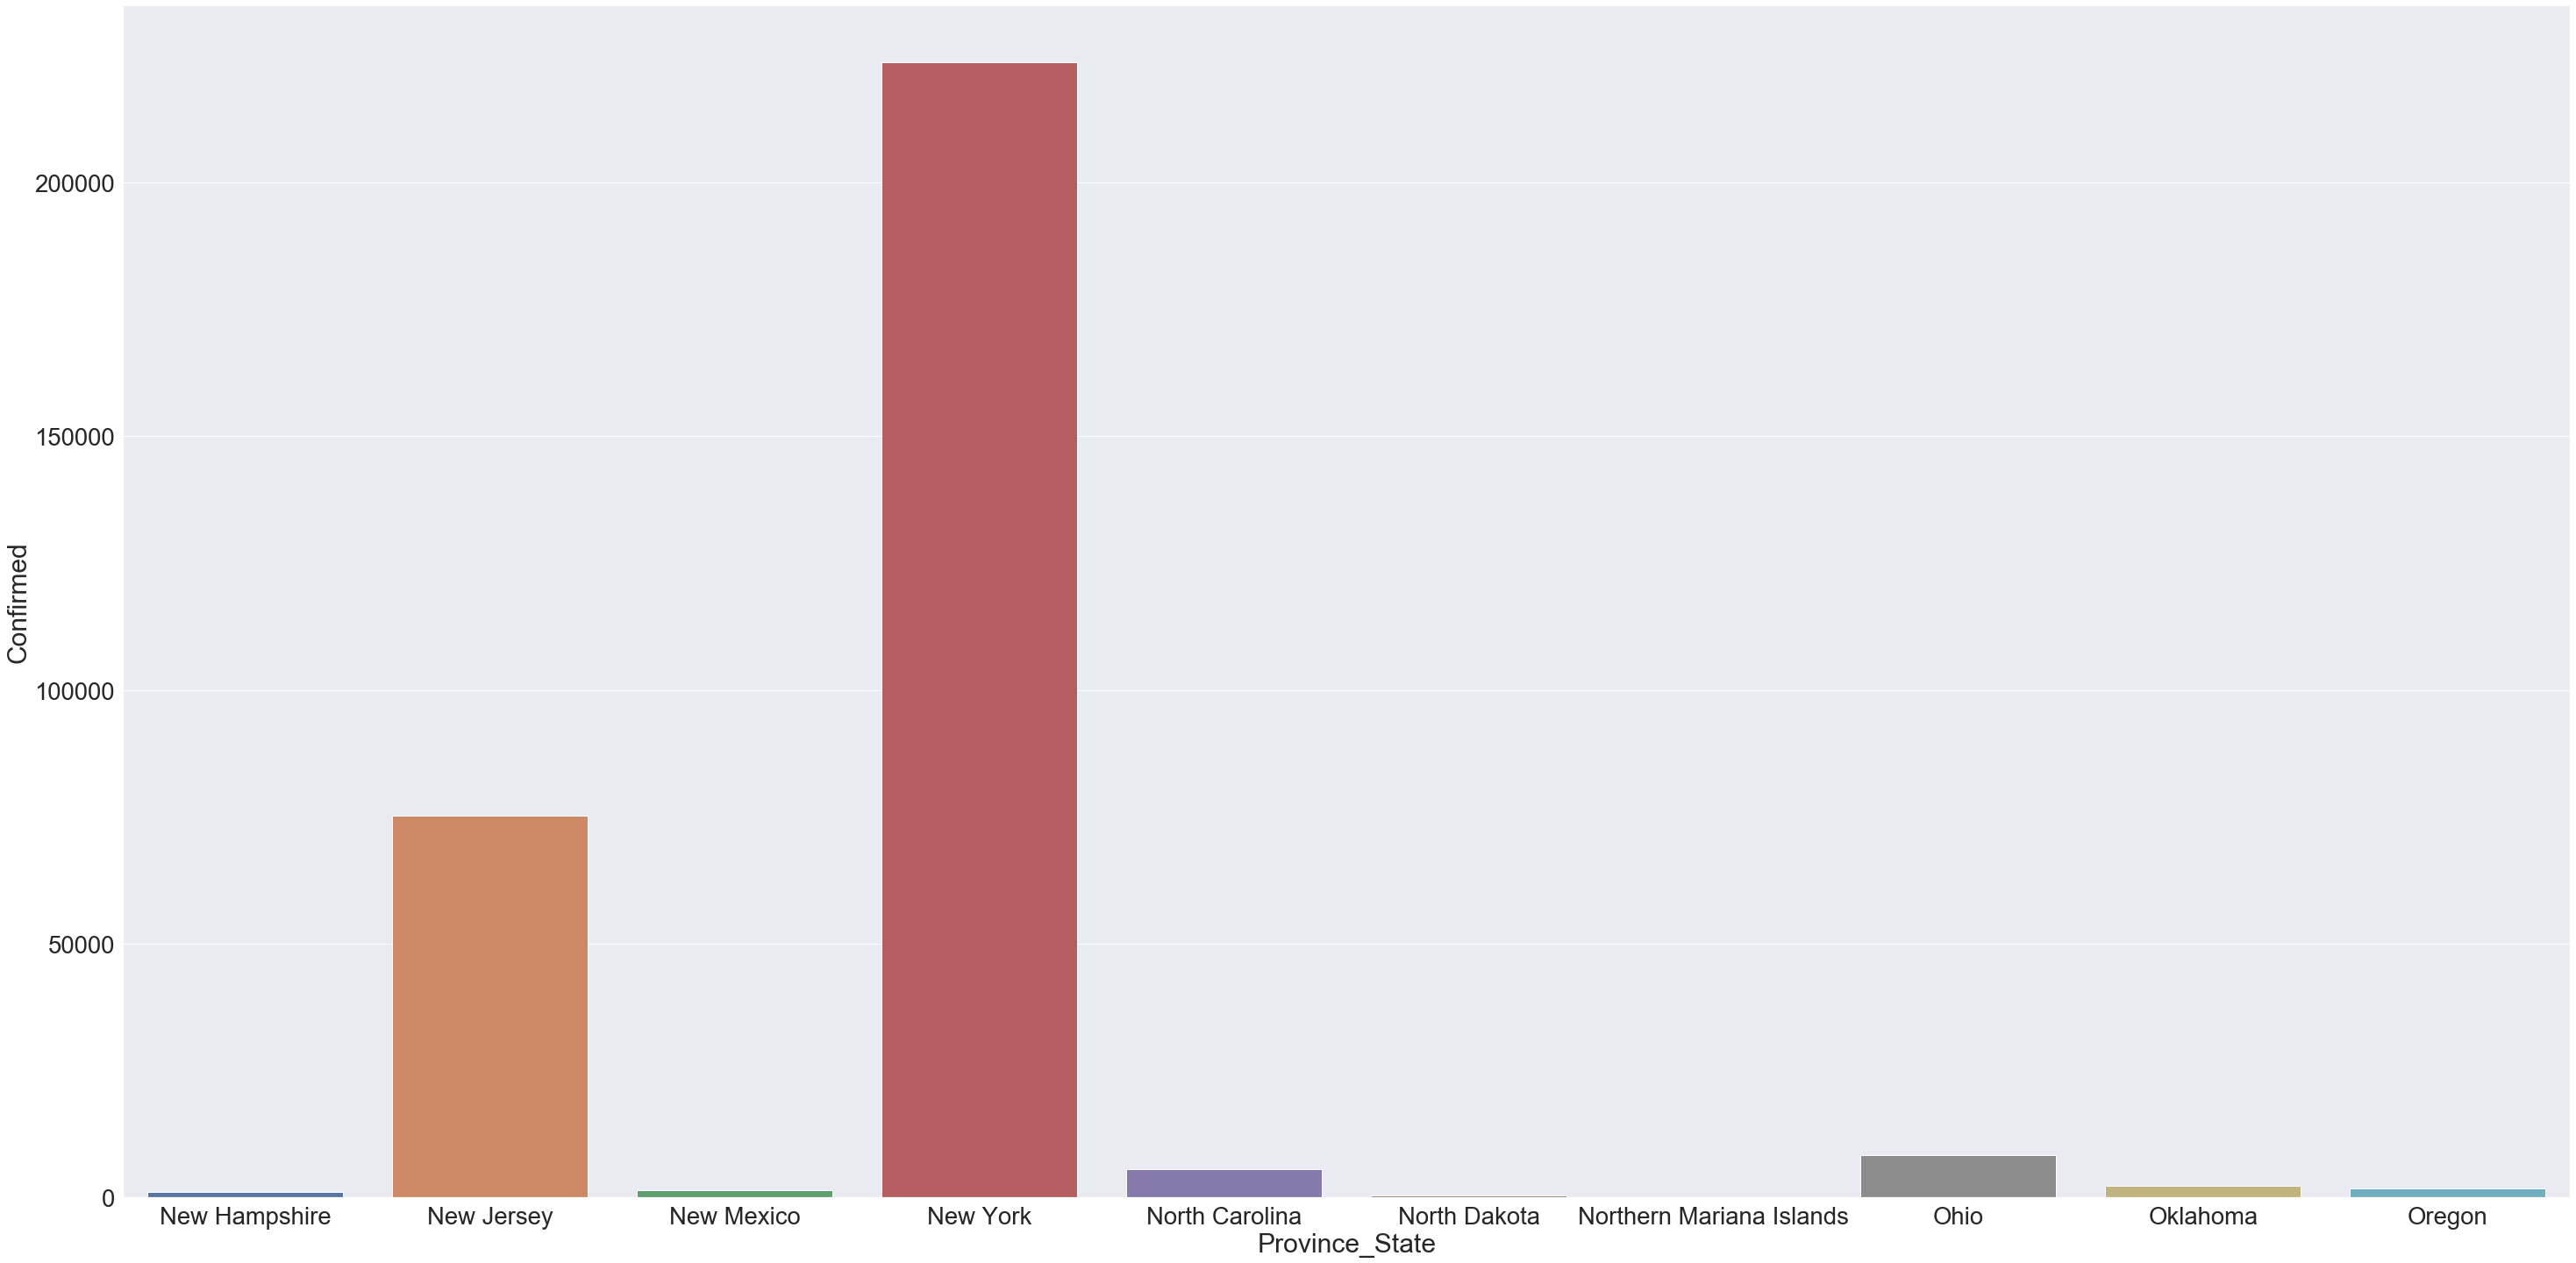

In [61]:
sns.barplot(x = df.index[30:40], y = df.loc["New Hampshire": "Oregon", "Confirmed"])

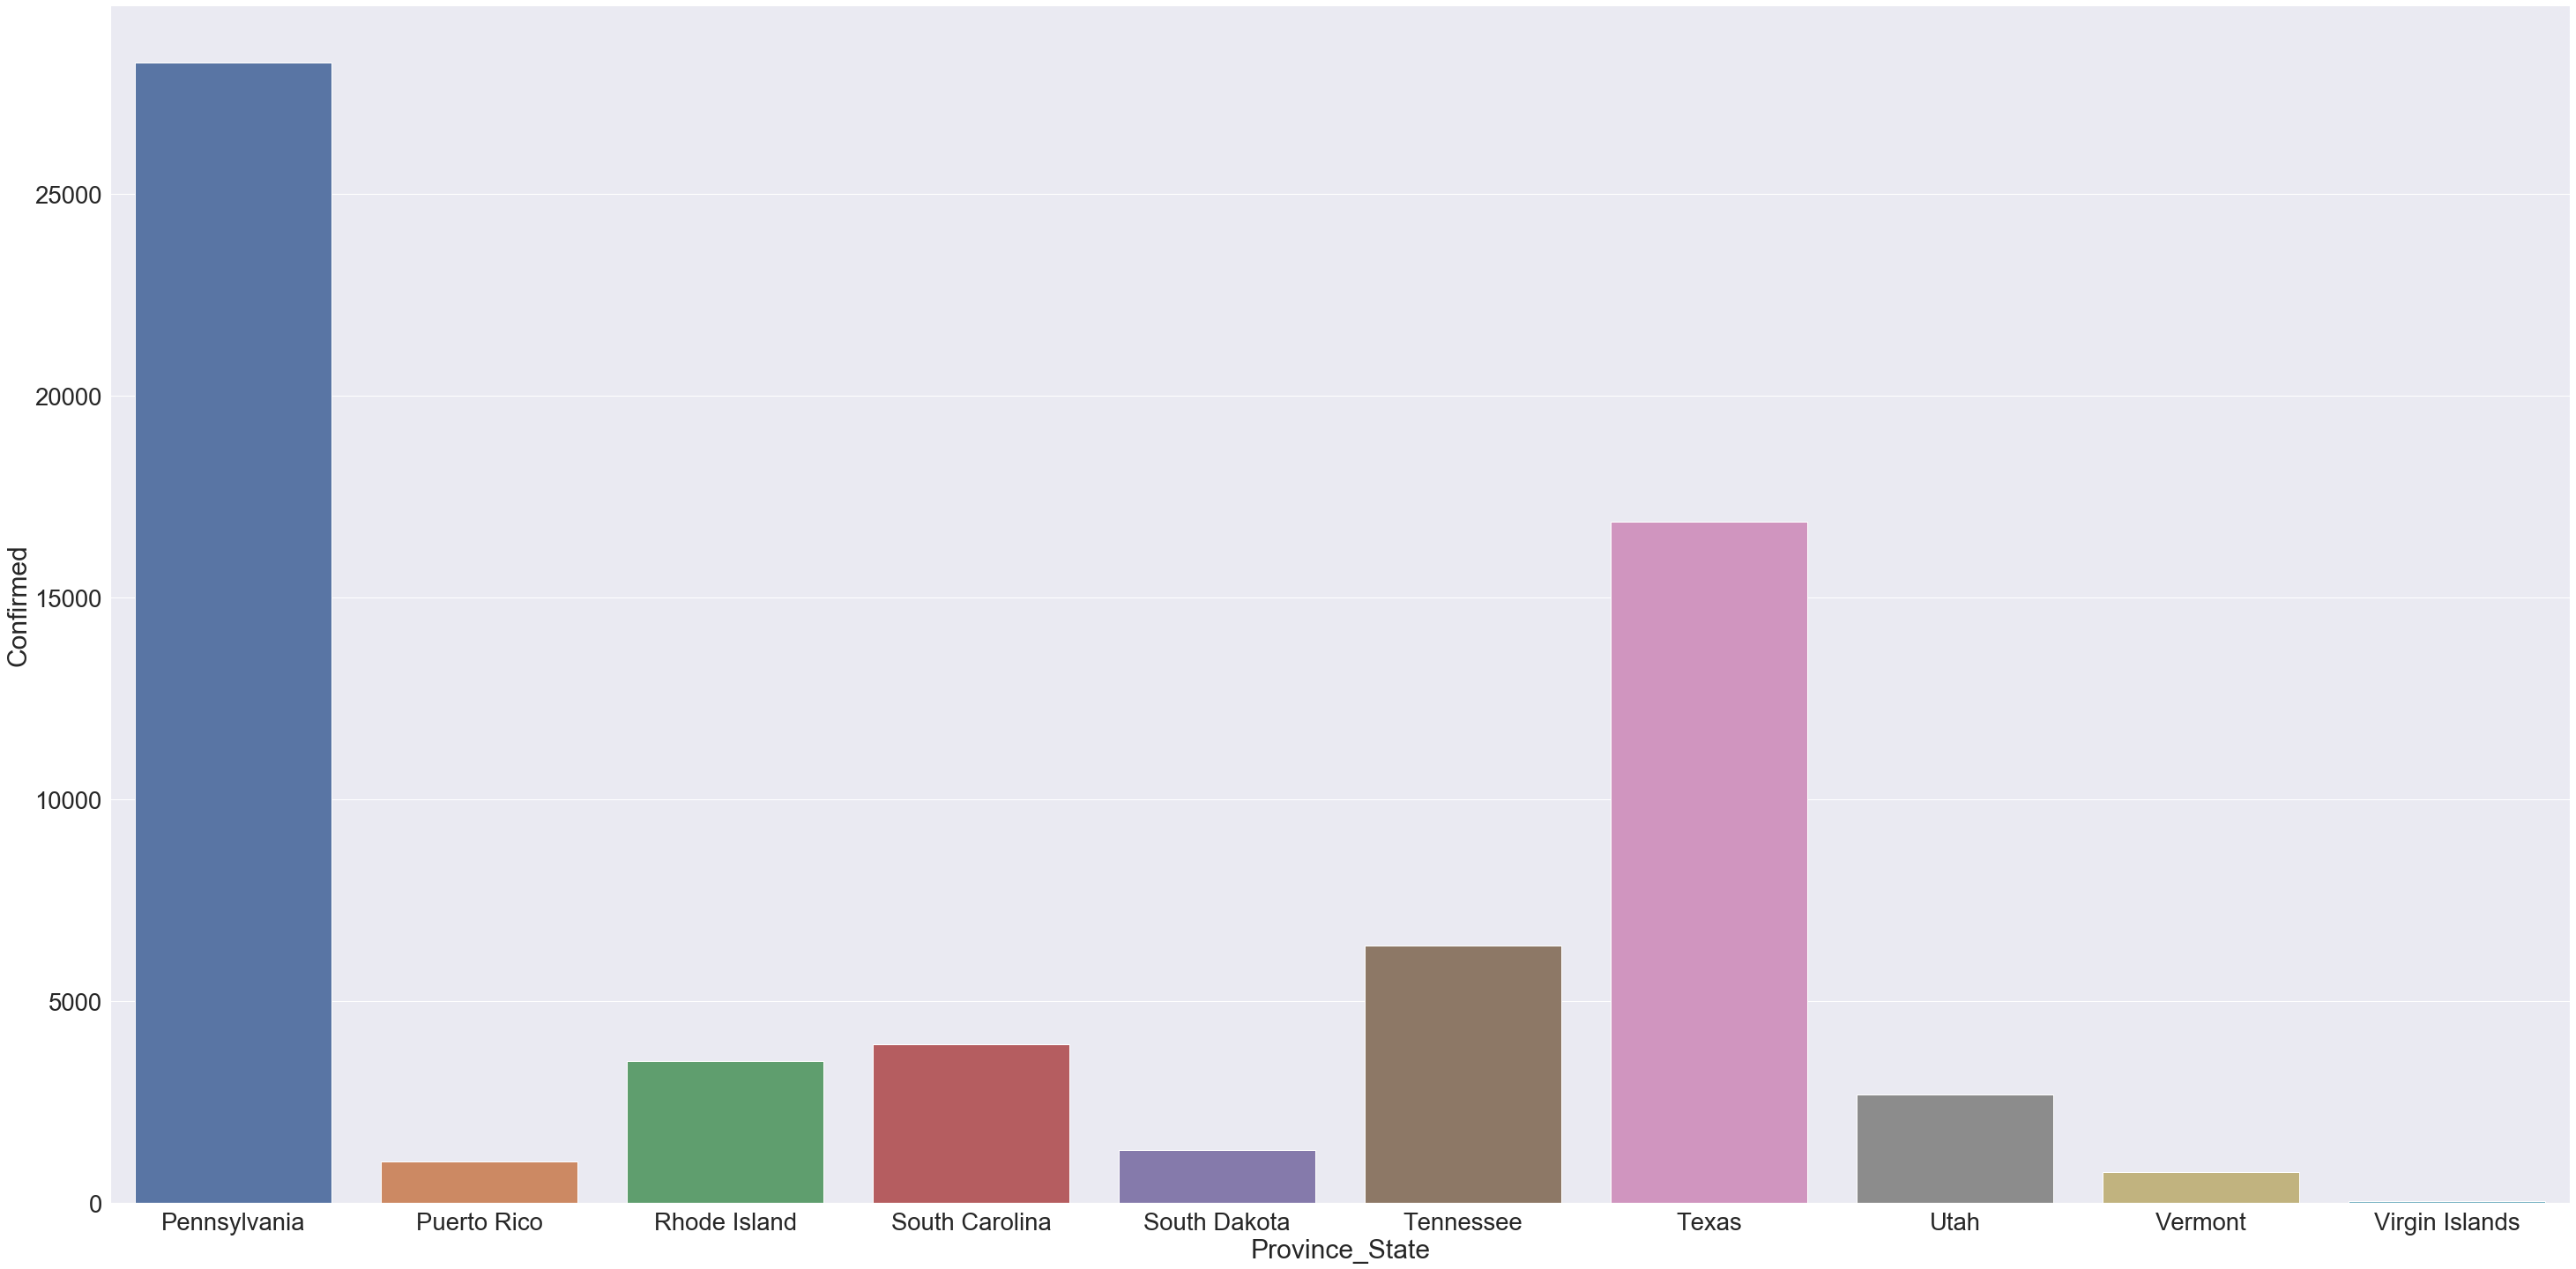

In [65]:
sns.barplot(x = df.index[40:50], y = df.loc["Pennsylvania": "Virgin Islands", "Confirmed"])

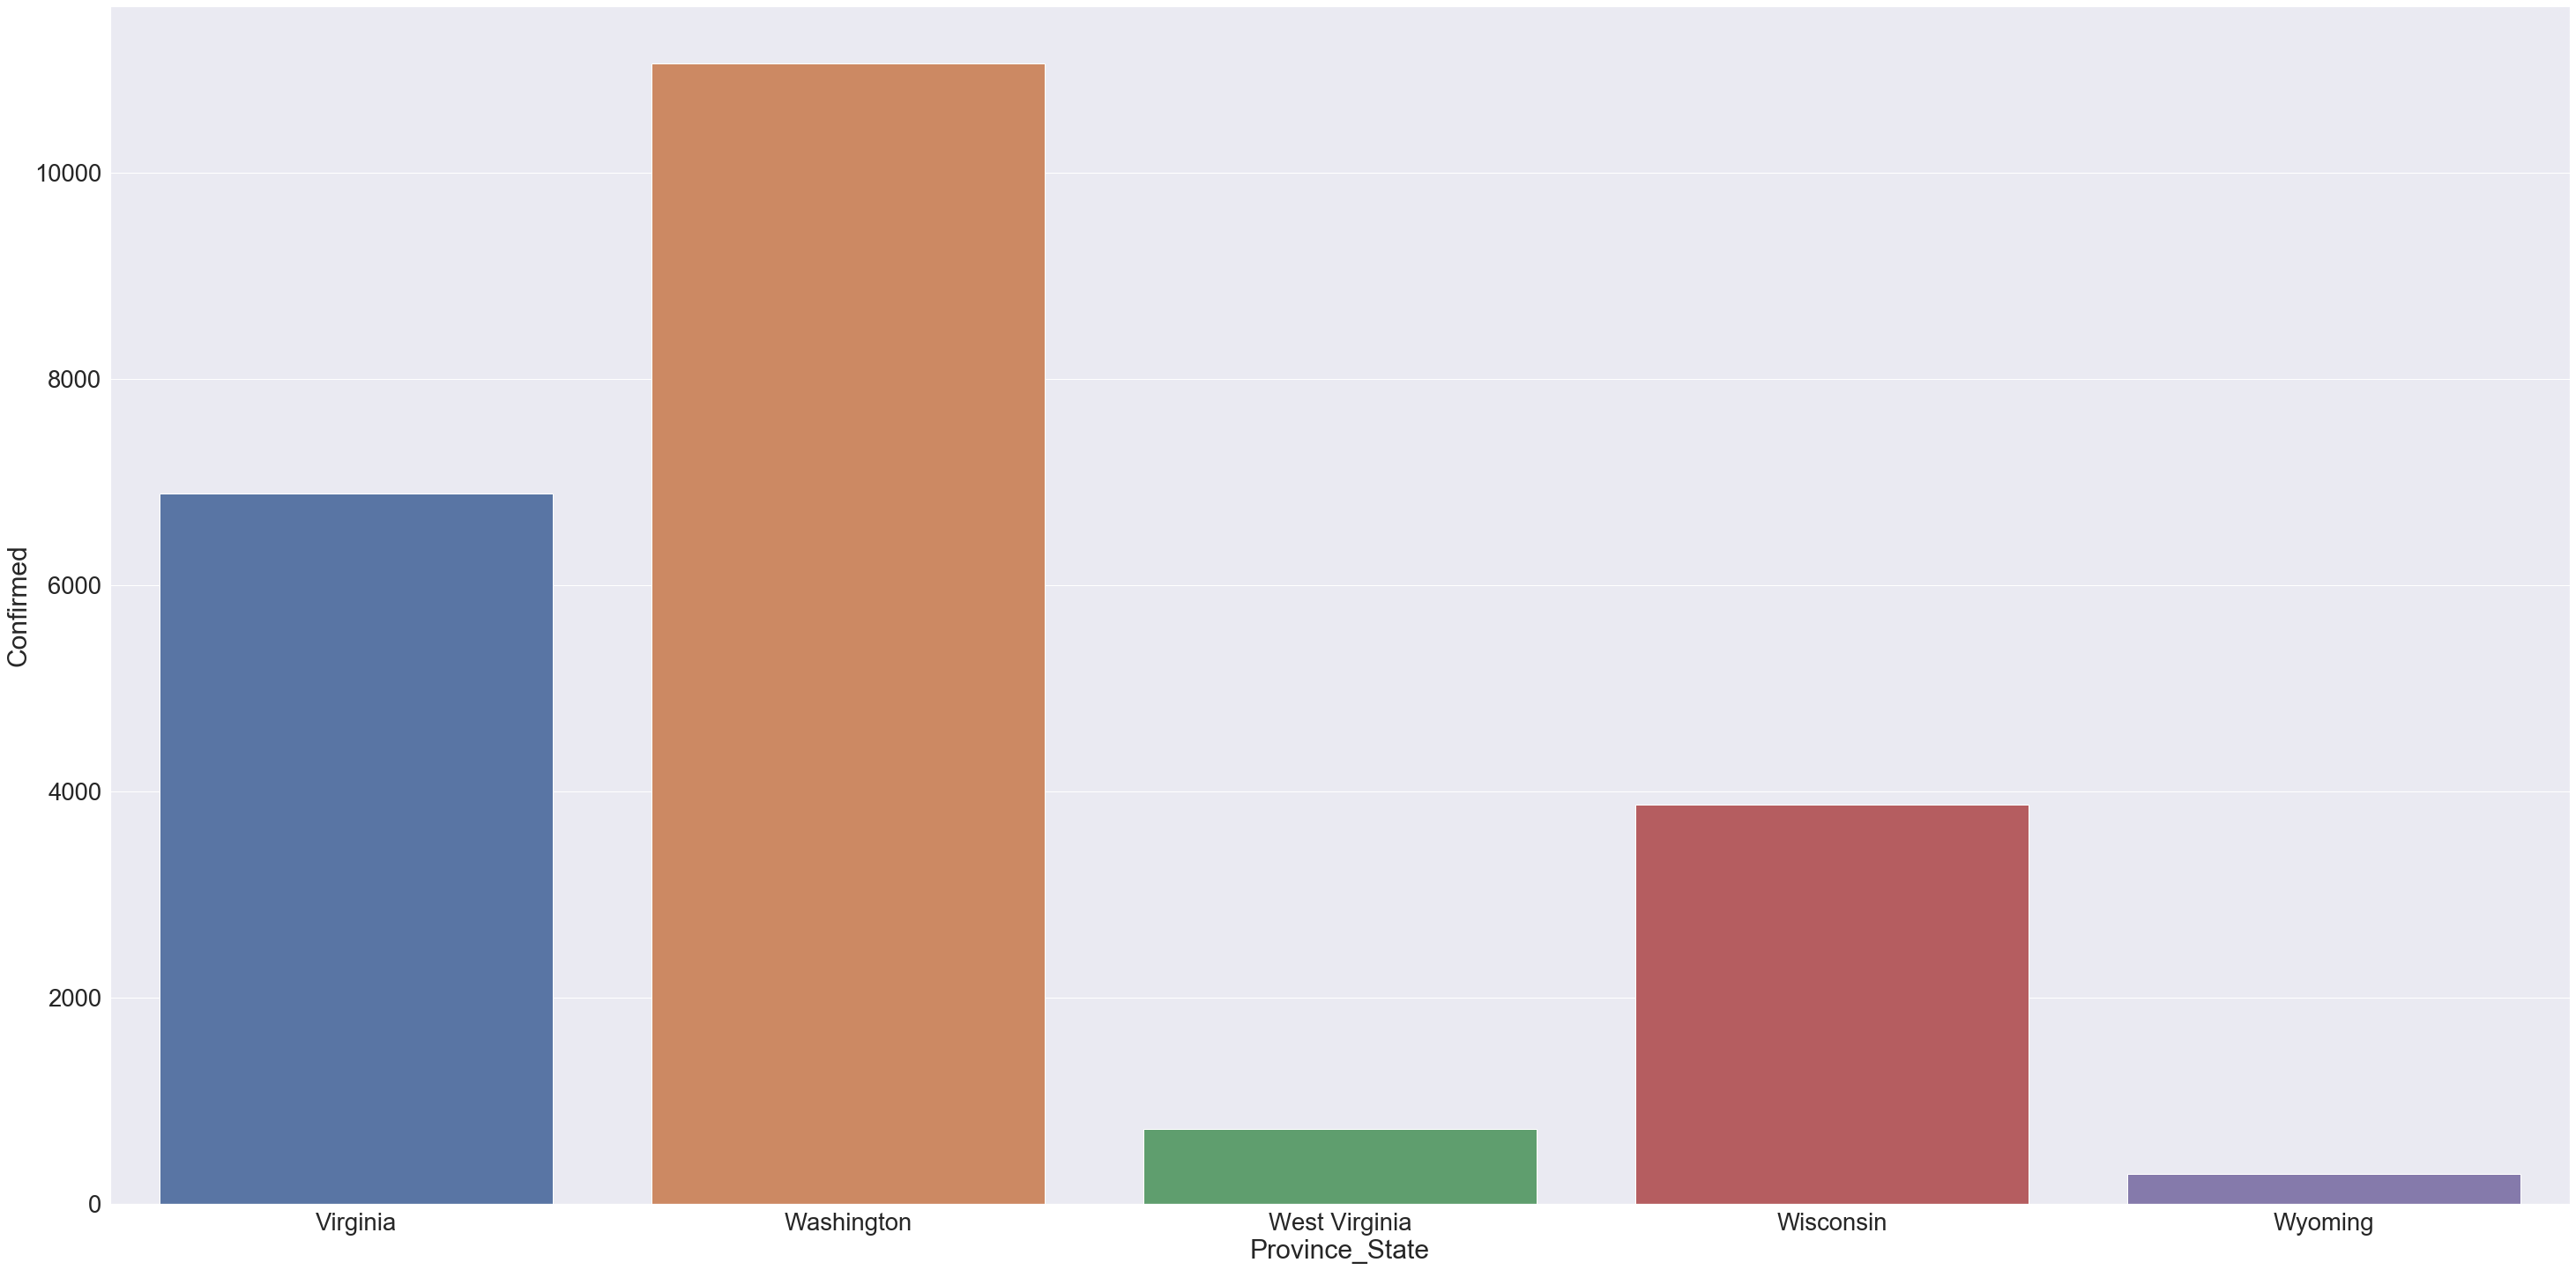

In [67]:
sns.barplot(x = df.index[50:56], y = df.loc["Virginia": "Wyoming", "Confirmed"])

In [88]:
sns.set(color_codes=True, font_scale = 1, rc={'figure.figsize':(20,10)})

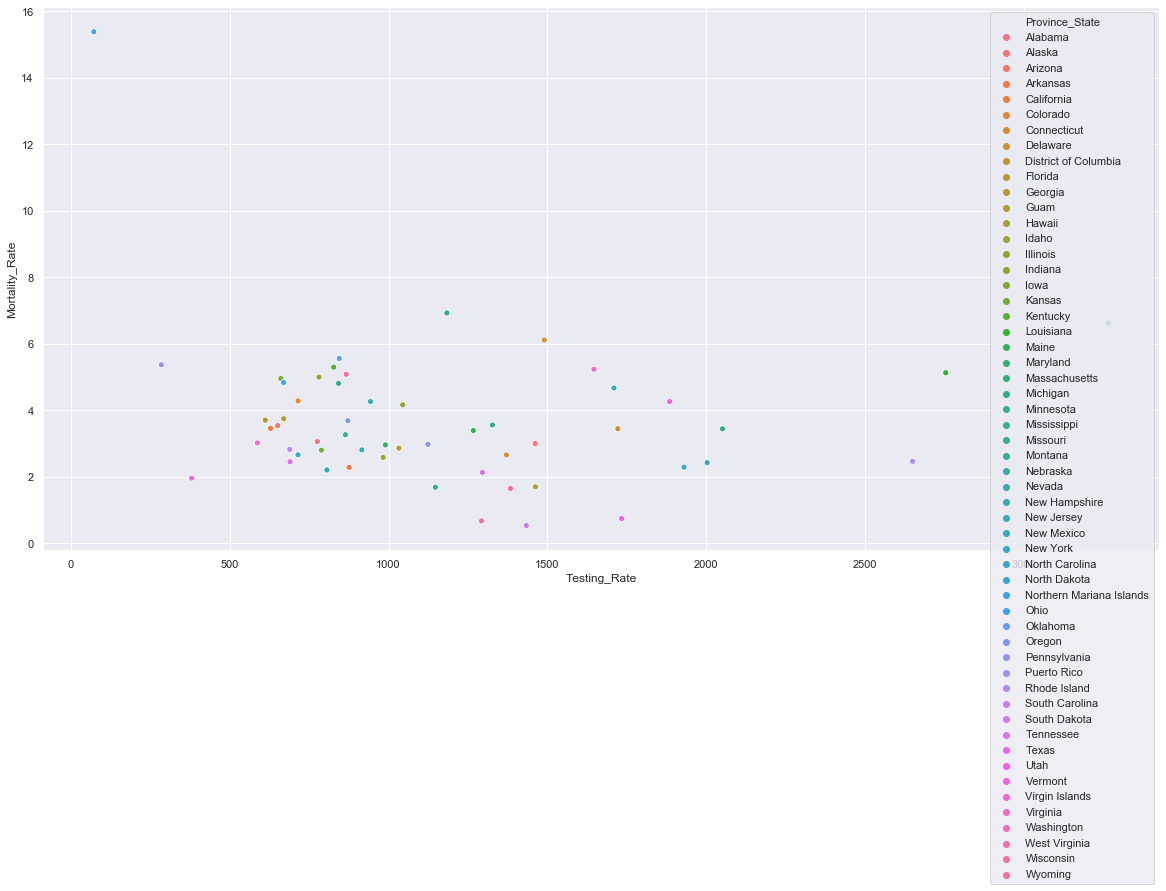

In [89]:
sns.scatterplot(x="Testing_Rate", y="Mortality_Rate", hue = df.index, data = df)